# Storytelling with Data

Trying to create tools for myself to create more attractive plots; maybe this will become a personal package?

In [1]:
# Importing packages
import seaborn as sns
import pandas as pd
from matplotlib import transforms, pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.colors import LogNorm
import matplotlib

# Setting parameters
%matplotlib inline

# Load the Iris dataset
iris_df = sns.load_dataset("iris")
iris_df.head()

# Overall color palette (full storytelling palette)
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

# matplotlib doesn't have a function for drawing text with
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

## Part 1: Telling an Iris Story

Very familiar with the Iris dataset; let's start with an exploratory plot, then change things around to make it explanatory

In [2]:
# Make exploratory plot: simple bar plot
# Group on species and get averages for everything else
grouped_data = iris_df.groupby('species').mean()
grouped_data

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Just based on this, the petals are the really big separator; let's look at the length

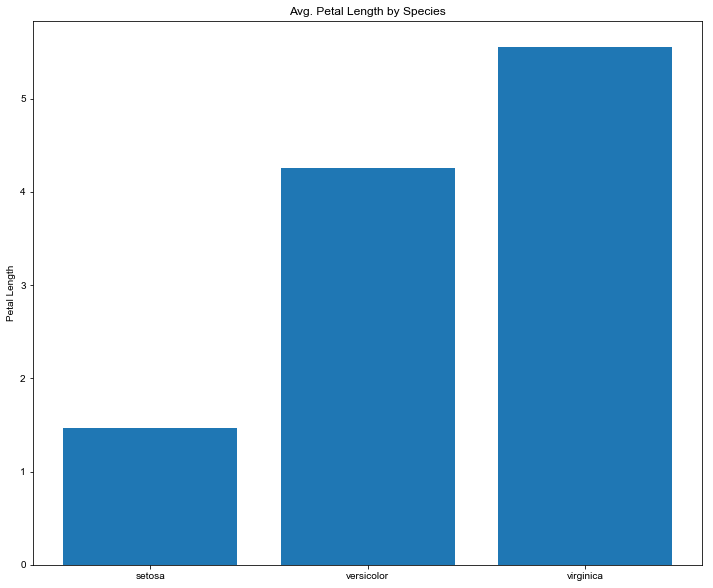

In [3]:
plt.figure(figsize = (12,10))
plt.bar(grouped_data.index, grouped_data['petal_length'])
plt.ylabel('Petal Length')
plt.title('Avg. Petal Length by Species')
plt.show()


Here's a story! The setosa species has much smaller petal length, so let's specifically change the chart to highlight this!

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

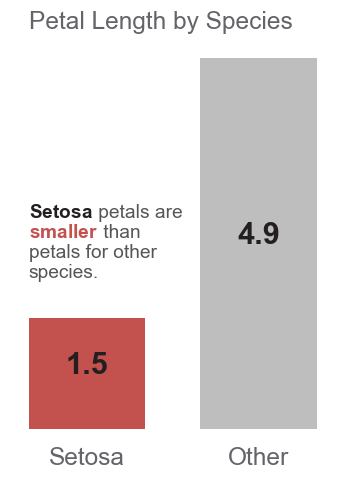

In [4]:
# Group the versicolor and virginica together; just make a simple list
setosa_vs = np.array([iris_df[iris_df.species == 'setosa']['petal_length'].mean(),
             iris_df[iris_df.species != 'setosa']['petal_length'].mean()])

# Create labels by rounding
rounded_labels = setosa_vs.round(decimals=1)

# Create new figure and set dimensions
fig, ax1 = plt.subplots(figsize=(9, 4.65), # width, height in inches
                        dpi=110)           # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# Draw bars
bars = ax1.bar(range(len(setosa_vs)),
               setosa_vs,
               width=0.68,
               color=[RED1] + [GRAY9])

# # Get rid of the bounding border; leave only the bottom
# ax1.spines['top'].set_visible(False) 
# ax1.spines['right'].set_visible(False)
# ax1.spines['bottom'].set_color(GRAY9)
# ax1.spines['left'].set_visible(False)
# ax1.spines['left'].set_linewidth(1.5)
# ax1.spines['bottom'].set_linewidth(1.5)

# remove ALL chart borders
for spine in ax1.spines.values():
    spine.set_visible(False)

# Get rid of axis ticks and left text altogether
ax1.tick_params(left = False, bottom=False, labelleft = False)

# Change labels for the x-axis
plt.setp(ax1, xticks=list(range(0, 2)), xticklabels=['Setosa', 'Other'])

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# Add text to tell the number story instead of axis ticks
for i, b in enumerate(bars):
    x = b.get_x() + b.get_width() / 2  # x-center of bar
    y = b.get_y() + b.get_height() / 2  # y-center of bar
    ax1.text(x, y,
             str(rounded_labels[i]),
             fontsize=20,
             fontweight='bold',
             horizontalalignment='center',
             color=GRAY1)

# title the plot
plt.text(-0.34, 5.3, 'Petal Length by Species', 
         fontsize=16, color=GRAY4)

# Add text that helps tell the story
rainbow_text(-0.34, 2.0,
    '$\\bf{Setosa}$|| petals are\n'
    '$\\bf{smaller}$|| than\n'
    'petals for other\n'
    'species.', # Note: last line CANNOT end in an end-line; it'll be split there and screw things up
    [[GRAY1, GRAY3], 
     [RED1, GRAY3], 
     [GRAY3],
     [GRAY3]],
    spacing=20,
    ax=ax1,
    fontsize=12.5)

# Show it
plt.show()

This tells a very different story than the previous plot! 

## Part 2: Making a plot from weight metric data

I've shown some stuff...maybe make something about scaling:

* Add success is on a different scale, it's big
* Performance stats and median boot are 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

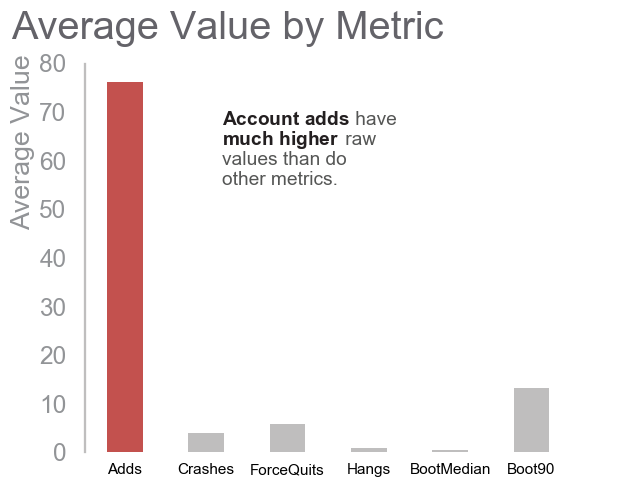

In [5]:
# Put together plot data...this is the visual that is a different scale thing?
add_success = np.array([64.7, 60.5, 81.4, 100, 74.1])
crash_rate = np.array([4.16, 4.12, 4.03, 3.23, 3.96])
force_rate = np.array([6.16, 5.94, 5.87, 5.28, 5.70])
hang_rate = np.array([0.902, 0.905, 0.867, 0.651, 0.856])
boot_median = np.array([0.14, 0.80, 0.35, 0.50, 0.41])
boot_90 = np.array([16.9, 19.3, 11.4, 5.9, 12.8])

# Aggregate by doing a mean of everything
all_means = np.array([add_success.mean(),
                      crash_rate.mean(),
                      force_rate.mean(),
                      hang_rate.mean(),
                      boot_median.mean(),
                      boot_90.mean()])
# Create labels by rounding
rounded_labels = all_means.round(decimals=1)

# Create new figure and set dimensions
fig, ax1 = plt.subplots(figsize=(15, 4.65), # width, height in inches
                        dpi=110)           # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# Draw bars
bars = ax1.bar(range(len(all_means)),
               all_means,
               width=0.44,
               color=[RED1] + [GRAY9] + [GRAY9] + [GRAY9] + [GRAY9] + [GRAY9])

# Get rid of the bounding border; leave only the bottom
ax1.spines['top'].set_visible(False) 
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color(GRAY9)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# Get rid of axis ticks and left text altogether
ax1.tick_params(left = False, bottom=False)

# Change labels for the x-axis
plt.setp(ax1, xticks=list(range(0, 7)), xticklabels=['Adds', 'Crashes', 'ForceQuits','Hangs','BootMedian','Boot90'])

# title the plot
plt.text(-1.4, 85, 'Average Value by Metric', 
         fontsize=26, color=GRAY4)

# title the axis
ax1.text(-1.4, 78, 'Average Value', fontsize=17.5, rotation='vertical', 
         color=GRAY7)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY7)
    # use trasformations to shift y tick labels slightly left
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# Add text that helps tell the story
rainbow_text(1.2, 55,
    '$\\bf{Account\ adds}$|| have\n'
    '$\\bf{much\ higher}$|| raw\n'
    'values than do\n'
    'other metrics.', # Note: last line CANNOT end in an end-line; it'll be split there and screw things up
    [[GRAY1, GRAY3], 
     [GRAY1, GRAY3], 
     [GRAY3],
     [GRAY3]],
    spacing=20,
    ax=ax1,
    fontsize=12.5)

plt.show()

## Appendix: Replicating plots

These are basically from this [github repo](https://github.com/empathy87/storytelling-with-data)

This is also where I got the functions and parameters I specified first

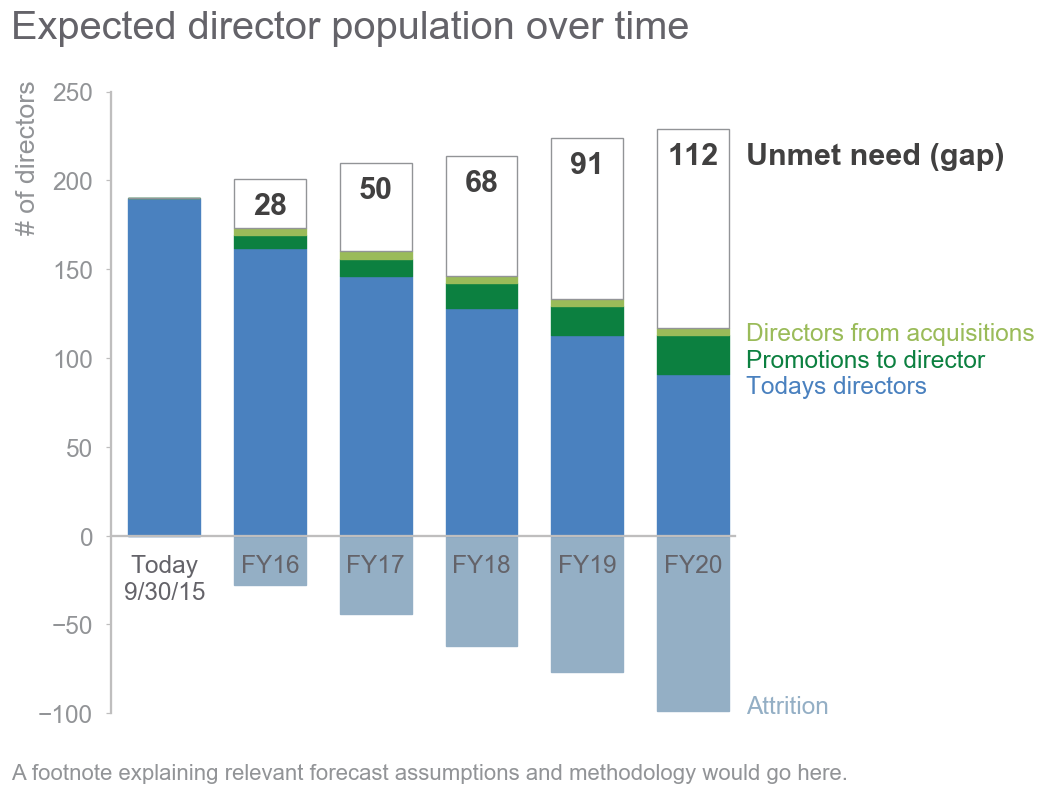

In [6]:
## Set the actual data for this plot

# # directors by year
X = ['Today\n9/30/15', 'FY16', 'FY17', 'FY18', 'FY19', 'FY20']
YA = np.array([0, -28, -44, -62, -77, -99]) # attrition
YT = np.array([190, 162, 146, 128, 113, 91]) # today
YP = np.array([0, 7, 10, 14, 16, 22]) # promoted
YQ = np.array([0, 4, 4, 4, 4, 4]) # acquisition
YU = np.array([0, 28, 50, 68, 91, 112]) # unmet gap


## Make the plots

# create new figure
fig, ax1 = plt.subplots(figsize=(9.5, 7.2),  # width, height in inches
                        dpi=110)  # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.103, right=0.7, top=0.881, bottom=0.096)

# set the data limits for the y,x-axis
ax1.set_ylim([-100, 250])
ax1.set_xlim([-0.5, 5.4])
# move x axes to zero
ax1.spines['bottom'].set_position('zero')

# Make the bars
plt.bar(list(range(0, 6)), YA, width=0.68, color=BLUE4, 
        edgecolor=BLUE4, linewidth=0.9)
plt.bar(list(range(0, 6)), YT, width=0.68, color=BLUE2, 
        edgecolor=BLUE2, linewidth=0.9)
plt.bar(list(range(0, 6)), YP, width=0.68, bottom=YT, color=GREEN1, 
        edgecolor=GREEN1, linewidth=0.9)
plt.bar(list(range(0, 6)), YQ, width=0.68, bottom=YT + YP, color=GREEN2, 
        edgecolor=GREEN2, linewidth=0.9)
white_bars = plt.bar(list(range(0, 6)), YU, width=0.68, bottom=YT + YP + YQ, 
                     color='white', edgecolor=GRAY7, linewidth=0.9)

# add numerical data labels for bars
for i, b in enumerate(white_bars):
    if YU[i] == 0:
        continue
    x = b.get_x() + b.get_width() / 2  # x-center of bar
    y = b.get_y() + b.get_height() - 20  # y-top of bar
    ax1.text(x, y,
             str(YU[i]),
             fontsize=20,
             fontweight='bold',
             horizontalalignment='center',
             color=GRAY2)

# add text for numerical data labels
ax1.text(5.5, y, 'Unmet need (gap)', fontsize=20, fontweight='bold', 
         color=GRAY2)

# add text labeling other bars
ax1.text(5.5, 110, 'Directors from acquisitions', fontsize=16, color=GREEN2)
ax1.text(5.5, 95, 'Promotions to director', fontsize=16, color=GREEN1)
ax1.text(5.5, 80, 'Today''s directors', fontsize=16, color=BLUE2)
ax1.text(5.5, -100, 'Attrition', fontsize=16, color=BLUE4)

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, xticks=list(range(0, 6)), xticklabels=X)

# remove chart border
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color(GRAY9)
ax1.spines['left'].set_color(GRAY9)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

# change y ticks color
ax1.tick_params(axis='y', colors=GRAY9)
# hide x ticks
ax1.tick_params(bottom=False)

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY4)
    # use trasformations to shift x tick labels slightly down
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(16)
    item.set_color(GRAY7)
    # use trasformations to shift y tick labels slightly left
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# title the axis
ax1.text(-1.4, 246, '# of directors', fontsize=17.5, rotation='vertical', 
         color=GRAY7)

# add footnote with the data source
plt.text(-1.45, -137,
         'A footnote explaining relevant forecast assumptions'
         ' and methodology would go here.',
         fontsize=14.5, color=GRAY7)

# title the plot
plt.text(-1.45, 280, 'Expected director population over time', 
         fontsize=26, color=GRAY4)

plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

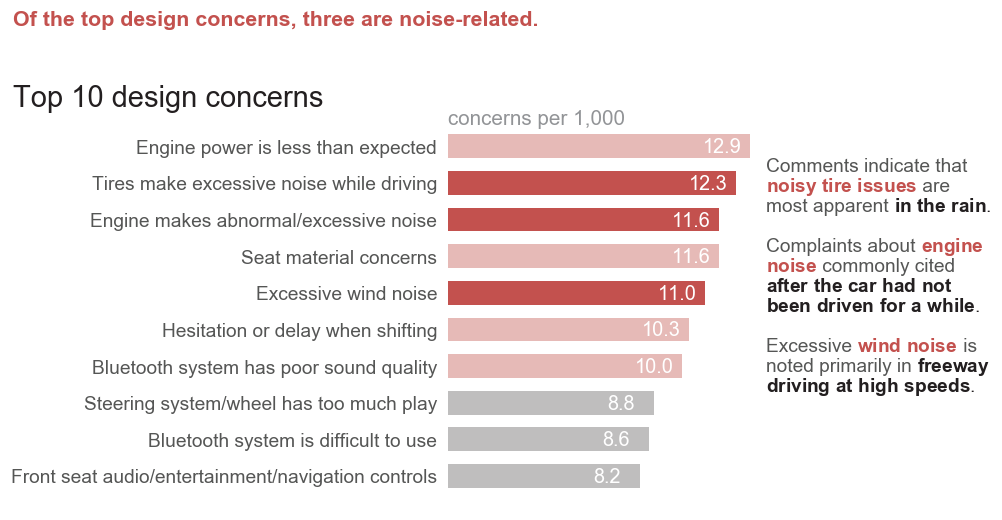

In [7]:
## The actual data
# concerns and their distribution
X = ['Front seat audio/entertainment/navigation controls',
     'Bluetooth system is difficult to use',
     'Steering system/wheel has too much play',
     'Bluetooth system has poor sound quality',
     'Hesitation or delay when shifting',
     'Excessive wind noise',
     'Seat material concerns',
     'Engine makes abnormal/excessive noise',
     'Tires make excessive noise while driving',
     'Engine power is less than expected']
Y = [8.2, 8.6, 8.8, 10.0, 10.3, 11.0, 11.6, 11.6, 12.3, 12.9]


# create new figure
fig, ax1 = plt.subplots(figsize=(9, 4.65), # width, height in inches
                        dpi=110)           # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# draw horizontal colored bars
bars = ax1.barh(range(len(X)),
                Y,
                height=0.65,
                color=[GRAY9]*3 + [RED2]*2 + [RED1, RED2] + [RED1]*2 + [RED2])

# add numerical data labels for each bar
for i, b in enumerate(bars):
    plt.text(b.get_width() - 2, b.get_y() + 0.15,
             str(Y[i]),
             fontsize=13,
             color='white')

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, yticks=np.arange(len(X)), yticklabels=X)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom=False, left=False, labelbottom=False)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12.5)
    item.set_color(GRAY3)

# remove chart border
for spine in ax1.spines.values():
    spine.set_visible(False)

# title the plot
ax1.text(-18.6, 10.1, 'Top 10 design concerns', fontsize=19, color=GRAY1)
ax1.text(-18.6, 12.3, 'Of the top design concerns, three are noise-related.',
         fontsize=14, color=RED1, fontweight='bold')
ax1.text(0, 9.6, 'concerns per 1,000', fontsize='13.5', color=GRAY7)

# add text note with concerns description
rainbow_text(
    13.6, 2.3,
    'Comments indicate that\n'
    '$\\bf{noisy\ tire\ issues}$|| are\n'
    'most apparent ||$\\bf{in\ the\ rain}$.\n'
    ' \n'
    'Complaints about ||$\\bf{engine}$\n'
    '$\\bf{noise}$|| commonly cited\n'
    '$\\bf{after\ the\ car\ had\ not}$\n'
    '$\\bf{been\ driven\ for\ a\ while}$.\n'
    ' \n'
    'Excessive ||$\\bf{wind\ noise}$|| is\n'
    'noted primarily in ||$\\bf{freeway}$\n'
    '$\\bf{driving\ at\ high\ speeds}$.',
    [[GRAY3], 
     [RED1, GRAY3], 
     [GRAY3, GRAY1],
     [GRAY1],
     [GRAY3, RED1], 
     [RED1, GRAY3], 
     [GRAY1], 
     [GRAY1],
     [GRAY1],
     [GRAY3, RED1, GRAY3], 
     [GRAY3, GRAY1], 
     [GRAY1]],
    spacing=20,
    ax=ax1,
    fontsize=12.5)


### Simple Text

Example from the book of simple text:

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Program Files (x86)\Microsof

Text(-0.15,0.17,'compared to 44% going into the program.')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

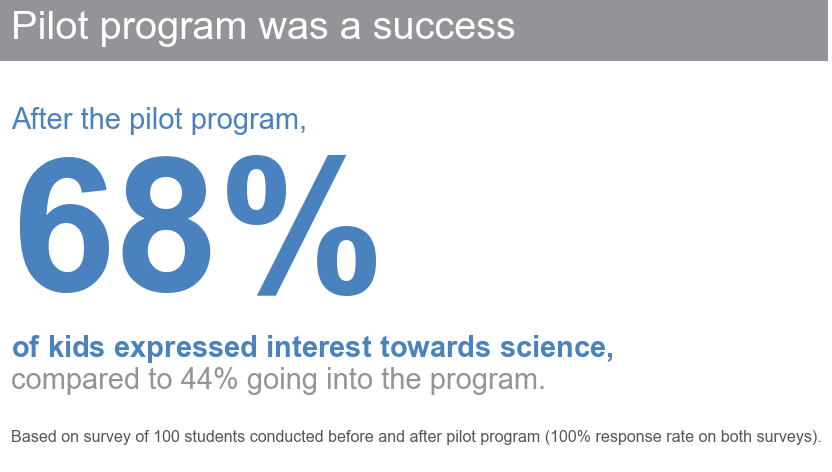

In [8]:

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')

# titile the plot
plt.text(-0.15, 1.03,
         'Pilot program was a success'+' '*27,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7, 'pad': 10, 'edgecolor': 'none'})

# footnote with the data source
plt.text(-0.15, 0.04,
         'Based on survey of 100 students conducted '
         'before and after pilot program '
         '(100% response rate on both surveys).',
         fontsize=10.5,
         color=GRAY3)

# add note to the plot
plt.text(-0.15, 0.81,
         'After the pilot program,',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.41,
         '$\\bf{68\%}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.25,
         # use mathtext \\bf for bold text
         '$\\bf{of\ kids\ expressed\ interest\ towards\ science,}$',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.17,
         'compared to 44% going into the program.',
         fontsize=19,
         color=GRAY7)

## Here's a plot for Kate 

She wants stuff from MonthlyAccounts dashboard; I'll just make it here


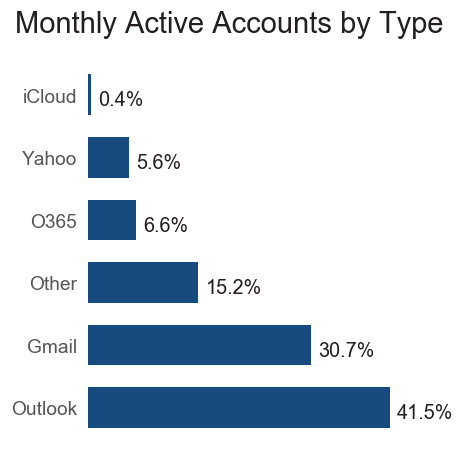

In [28]:
## The actual data
# concerns and their distribution
X = ['Outlook',
     'Gmail',
     'Other',
     'O365',
     'Yahoo',
     'iCloud']

rawCounts = np.array([14653016, 10852529, 5356795, 2340936, 1983786, 131939])
Y = (rawCounts/(rawCounts.sum()) * 100).round(decimals = 1)


# create new figure
fig, ax1 = plt.subplots(figsize=(9, 4.65), # width, height in inches
                        dpi=110)           # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# draw horizontal colored bars
bars = ax1.barh(range(len(X)),
                Y,
                height=0.65,
                color= BLUE1)#[GRAY9]*6) + [RED2]*2 + [RED1, RED2] + [RED1]*2 + [RED2])

# add numerical data labels for each bar
for i, b in enumerate(bars):
    plt.text(b.get_width() +1 , b.get_y() + 0.15,
             str(Y[i]) + '%',
             fontsize=13,
             color=GRAY1)

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, yticks=np.arange(len(X)), yticklabels=X)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom=False, left=False, labelbottom=False)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12.5)
    item.set_color(GRAY3)

# remove chart border
for spine in ax1.spines.values():
    spine.set_visible(False)

# title the plot
ax1.text(-10, 6, 'Monthly Active Accounts by Type', fontsize=19, color=GRAY1)

plt.show()

Same but reversed:

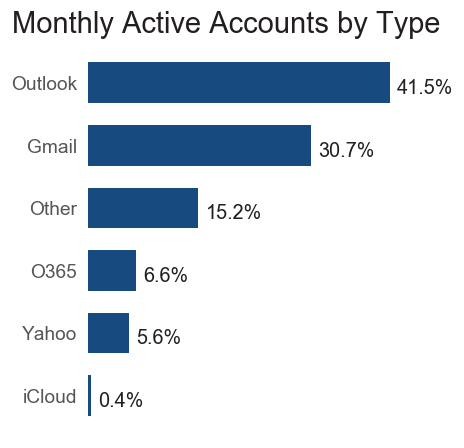

In [36]:
## The actual data
# concerns and their distribution
X = ['iCloud',
     'Yahoo',
     'O365',
     'Other',
     'Gmail',
     'Outlook']

rawCounts = np.array([131939, 1983786, 2340936, 5356795, 10852529, 14653016])
Y = (rawCounts/(rawCounts.sum()) * 100).round(decimals = 1)


# create new figure
fig, ax1 = plt.subplots(figsize=(9, 4.65), # width, height in inches
                        dpi=110)           # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# draw horizontal colored bars
bars = ax1.barh(range(len(X)),
                Y,
                height=0.65,
                color= BLUE1)#[GRAY9]*6) + [RED2]*2 + [RED1, RED2] + [RED1]*2 + [RED2])

# add numerical data labels for each bar
for i, b in enumerate(bars):
    plt.text(b.get_width() +1 , b.get_y() + 0.15,
             str(Y[i]) + '%',
             fontsize=13,
             color=GRAY1)

# set properties for axes object (ticks for all issues with labels)
plt.setp(ax1, yticks=np.arange(len(X)), yticklabels=X)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom=False, left=False, labelbottom=False)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12.5)
    item.set_color(GRAY3)

# remove chart border
for spine in ax1.spines.values():
    spine.set_visible(False)

# title the plot
ax1.text(-10.5, 5.8, 'Monthly Active Accounts by Type', fontsize=19, color=GRAY1)

plt.show()